# DPCM Card Game Simulator

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import ast

### Variables

In [3]:
purple = '#7f00ff'
orange = '#ff4500'

### Analysis

In [ ]:
results_df = pd.read_csv('../data/results.csv')

In [ ]:
fig = plt.figure(1, figsize=(15, 7))

n, bins, patches = plt.hist(results_df['Turns'], bins=np.arange(0, max(results_df['Turns']), 5), color=purple, edgecolor='w')

x = range(max(results_df['Turns']))
plt.xticks(np.arange(min(x), max(x)+10, 5))

n = list(n)
patches[n.index(max(n))].set_fc(orange)

plt.xlabel('Turns per Game')
plt.ylabel('Number of games')

plt.title('Turns Distribution')

plt.show()

In [ ]:
fig = plt.figure(1, figsize=(15, 7))

not_fair_file = 'not_fair.csv'
fair_file = 'fair.csv'

not_fair_df = pd.read_csv('../data/' + not_fair_file)
fair_df = pd.read_csv('../data/' + fair_file)

plt.plot(not_fair_df.index, not_fair_df['Rate'], color = orange, label='Win-Rate not fair')
plt.plot(fair_df.index, fair_df['Rate'], color = purple, label='Win-Rate fair')

plt.hlines(0.5, 0, len(not_fair_df), colors='black', linestyles='dashed')

plt.title('Win Rate with Starting Advantage')

plt.legend(loc='lower right')

plt.xlabel('Simulations')
plt.ylabel('Win Rate')

plt.show()

In [ ]:
print(f'{abs(not_fair_df['Rate'].iloc[-1] - fair_df['Rate'].iloc[-1])*100:.2f}%')

### Human VS AI

In [ ]:
fig = plt.figure(1, figsize=(15, 7))

fair_file = 'fair.csv'
fair_df = pd.read_csv('../data/' + fair_file)

plt.plot(results_df.index, results_df['Rate'], color = orange, label='AI')
plt.plot(fair_df.index, fair_df['Rate'], color = purple, label='Human')

plt.hlines(0.5, 0, len(not_fair_df), colors='black', linestyles='dashed')

plt.title('Win Rate with Starting Advantage')

plt.legend(loc='lower right')

plt.xlabel('Simulations')
plt.ylabel('Win Rate')

plt.show()

In [ ]:
print(f'{abs(results_df['Rate'].iloc[-1] - fair_df['Rate'].iloc[-1])*100:.2f}%')

### Visits

In [ ]:
visited_df = pd.read_csv('../data/visited.csv')

In [ ]:
visited_df['MAX'] = visited_df.iloc[:, 1:].max(axis=1)
visited_df['HAND'] = visited_df['ID'].apply(lambda x: sum(eval(x)[3:]))

In [ ]:
visited_pivot = visited_df.drop(columns='MAX').iloc[:, 1:].groupby('HAND').sum()
visited_pivot = visited_pivot.replace(0, np.NaN)

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

cmap_custom = LinearSegmentedColormap.from_list('custom', [purple, orange])

sns.heatmap(visited_pivot, 
            fmt='.0f', 
            linewidth = 0.3, 
            annot = True,
            cbar = True,
            cmap=cmap_custom,
            square=True)

ax.title.set_text('Visits')

ax.set(xlabel='Move taken', ylabel='Hand Cards Playable')

plt.show()

### Exploration

In [ ]:
visits_df = pd.read_csv('../data/visits.csv')

In [ ]:
visits_df.head()

In [ ]:
visits_df['Cumsum'] = visits_df['Visits'].cumsum()

In [ ]:
visits_df.head()

In [ ]:
fig = plt.figure(1, figsize=(10, 10))

x = np.linspace(0, max(visits_df.index))
y = x

plt.plot(visits_df.index, visits_df['Cumsum'], color = orange, label='Coverage')
plt.plot(x, y, color = 'black', label='Linear', linestyle='--')

plt.title('State/Move Coverage')

plt.legend(loc='lower right')

plt.xlabel('Turns of games')
plt.ylabel('State/Move Pairs Visited')

plt.show()

### Cards Playable

In [ ]:
visited_df = pd.read_csv('../data/visited.csv')

In [ ]:
visited_df.head()

In [ ]:
visited_df['VISITS'] = visited_df.iloc[:, 1:].max(axis=1)

In [ ]:
visited_filtered_df = visited_df[visited_df['VISITS'] > 0]

In [ ]:
visited_filtered_df.reset_index(drop=True, inplace=True)

In [ ]:
visited_filtered_df.head()

In [ ]:
print(len(visited_df), len(visited_filtered_df), str(round(len(visited_filtered_df)*100/len(visited_df), 2)) + '%')

In [ ]:
state_max_df = visited_filtered_df[['ID', 'VISITS']].copy()

In [ ]:
state_max_df.head()

In [ ]:
state_max_df['ID'] = state_max_df['ID'].apply(ast.literal_eval)

In [ ]:
state_max_df.head()

In [ ]:
state_max_df['HAND'] = state_max_df['ID'].apply(lambda x: x[3:])

In [ ]:
state_max_df.head()

In [ ]:
state_max_df['HAND'] = state_max_df['HAND'].apply(lambda x: sum(x))

In [ ]:
state_max_df.head()

In [ ]:
state_max_df = state_max_df.drop('ID', axis=1)

In [ ]:
state_max_df.head()

In [ ]:
state_max_df = pd.DataFrame(state_max_df.groupby('HAND')['VISITS'].sum())

In [ ]:
state_max_df.reset_index(drop=False, inplace=True)

In [ ]:
state_max_df.head()

In [ ]:
state_max_df['PERCENTAGE'] = round((state_max_df['VISITS'] / state_max_df['VISITS'].sum())*100, 2)

In [ ]:
state_max_df.head()

In [ ]:
state_max_df = state_max_df.drop('VISITS', axis=1)

In [ ]:
state_max_df.head()

In [ ]:
fig = plt.figure(1, figsize=(15, 7))

barra_piu_alta = state_max_df.loc[state_max_df['PERCENTAGE'].idxmax()]

plt.bar(state_max_df['HAND'], state_max_df['PERCENTAGE'], color=purple, edgecolor='w')
plt.bar(barra_piu_alta['HAND'], barra_piu_alta['PERCENTAGE'], color=orange)

plt.xticks(state_max_df['HAND'])

plt.xlabel('Cards in hand')
plt.ylabel('Occurences %')

plt.title('Quantity of playable Cards')

plt.show()

#### Q-Values

In [ ]:
q_df = pd.read_csv('../data/q.csv')

In [ ]:
q_df['MAX'] = q_df.iloc[:, 1:].max(axis=1)

In [ ]:
q_df['HAND'] = q_df['ID'].apply(lambda x: sum(eval(x)[3:]))

In [ ]:
q_curve = q_df.copy()

In [ ]:
q_curve[['HAND', 'MAX']] = q_curve[['HAND', 'MAX']].replace(0, np.NaN)

q_mean = pd.Series(q_curve.iloc[:, 1:].groupby('HAND').mean()['MAX'])
q_max  = pd.Series(q_curve.iloc[:, 1:].groupby('HAND').max()['MAX'])
q_std  = pd.Series(q_curve.iloc[:, 1:].groupby('HAND').std()['MAX']) / 2

In [ ]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(q_mean.index, q_mean, label='Mean', marker='o', color=purple)
plt.plot(q_max.index,  q_max,  label='Max',  marker='o', color=orange)

plt.fill_between(q_mean.index, q_mean - q_std, q_mean + q_std, alpha=1/5, color=purple, edgecolor=None)

plt.xticks(q_mean.index)

plt.xlabel('Number of Minimum Hand Cards')
plt.ylabel('Q-Value')

plt.title('Aggregated Q-Values')

plt.legend()

plt.show()

In [ ]:
q_pivot = q_df.replace(0, np.NaN)
q_pivot = q_pivot.drop(columns='MAX').iloc[:, 1:].groupby('HAND').mean()

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

cmap_custom = LinearSegmentedColormap.from_list('custom', [purple, orange])

sns.heatmap(q_pivot, 
            fmt='.2f', 
            linewidth = 0.3, 
            annot = True,
            cbar = True,
            cmap=cmap_custom,
            square=True)

ax.title.set_text('Visits')

ax.set(xlabel='Move taken', ylabel='Hand Cards Playable')

plt.show()

### Strategy

In [4]:
state_seen_df = pd.read_csv('../data/state_seen.csv')

In [5]:
state_seen_df.head()

,Before,After
0,"[3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]","[3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]"
1,"[3, 3, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]","[3, 3, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]"
2,"[2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]","[2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]"
3,"[2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]","[2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]"
4,"[2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]","[2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [6]:
state_seen_df['Before'] = state_seen_df['Before'].apply(ast.literal_eval)
state_seen_df['After'] = state_seen_df['After'].apply(ast.literal_eval)

In [7]:
state_seen_df.head()

,Before,After
0,"[3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]","[3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]"
1,"[3, 3, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]","[3, 3, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]"
2,"[2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]","[2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]"
3,"[2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]","[2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]"
4,"[2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]","[2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [8]:
state_seen_df['Before'] = state_seen_df['Before'].apply(lambda x: x[3:11])
state_seen_df['After'] = state_seen_df['After'].apply(lambda x: x[3:11])

In [9]:
state_seen_df.head()

,Before,After
0,"[0, 0, 1, 0, 0, 0, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 1]"
1,"[0, 0, 1, 0, 0, 1, 0, 0]","[0, 0, 1, 0, 0, 1, 0, 0]"
2,"[0, 0, 1, 0, 0, 1, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0]"
3,"[0, 0, 1, 0, 0, 0, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 0]"
4,"[0, 0, 1, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0]"


In [10]:
state_seen_df = state_seen_df[state_seen_df['Before'] != state_seen_df['After']]

In [11]:
state_seen_df.head()

,Before,After
2,"[0, 0, 1, 0, 0, 1, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0]"
3,"[0, 0, 1, 0, 0, 0, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 0]"
5,"[0, 0, 0, 0, 0, 0, 1, 0]","[1, 0, 0, 0, 0, 0, 1, 0]"
7,"[1, 0, 1, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0]"
12,"[0, 0, 1, 0, 0, 1, 0, 1]","[0, 1, 1, 0, 0, 1, 0, 1]"


In [12]:
def trova_differenze(lista1, lista2):
    return [i for i, (elem1, elem2) in enumerate(zip(lista1, lista2)) if elem1 != elem2]

In [13]:
state_seen_df['indici_differenze'] = state_seen_df.apply(lambda row: trova_differenze(row['Before'], row['After']), axis=1)

In [14]:
state_seen_df.head()

,Before,After,indici_differenze
2,"[0, 0, 1, 0, 0, 1, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0]",[5]
3,"[0, 0, 1, 0, 0, 0, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 0]",[7]
5,"[0, 0, 0, 0, 0, 0, 1, 0]","[1, 0, 0, 0, 0, 0, 1, 0]",[0]
7,"[1, 0, 1, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0]",[0]
12,"[0, 0, 1, 0, 0, 1, 0, 1]","[0, 1, 1, 0, 0, 1, 0, 1]",[1]


In [15]:
state_seen_df = state_seen_df[(state_seen_df['indici_differenze'].apply(len) > 1) & (state_seen_df['indici_differenze'].apply(len) < 3)]

In [16]:
state_seen_df.head()

,Before,After,indici_differenze
26,"[1, 0, 0, 0, 0, 1, 0, 1]","[1, 1, 0, 0, 1, 1, 0, 1]","[1, 4]"
33,"[0, 1, 1, 0, 0, 0, 1, 1]","[0, 1, 0, 0, 0, 0, 0, 1]","[2, 6]"
35,"[0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 1, 0, 1, 0, 1]","[3, 7]"
53,"[0, 0, 1, 0, 0, 1, 0, 0]","[0, 1, 1, 1, 0, 1, 0, 0]","[1, 3]"
54,"[0, 1, 1, 1, 0, 1, 0, 0]","[0, 0, 1, 1, 0, 0, 0, 0]","[1, 5]"


In [17]:
state_seen_df['indici_differenze'] = state_seen_df['indici_differenze'].apply(tuple)

In [18]:
state_seen_df = pd.concat([state_seen_df, state_seen_df.iloc[[0]]], ignore_index=True)

In [19]:
state_seen_df.head()

,Before,After,indici_differenze
0,"[1, 0, 0, 0, 0, 1, 0, 1]","[1, 1, 0, 0, 1, 1, 0, 1]","(1, 4)"
1,"[0, 1, 1, 0, 0, 0, 1, 1]","[0, 1, 0, 0, 0, 0, 0, 1]","(2, 6)"
2,"[0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 1, 0, 1, 0, 1]","(3, 7)"
3,"[0, 0, 1, 0, 0, 1, 0, 0]","[0, 1, 1, 1, 0, 1, 0, 0]","(1, 3)"
4,"[0, 1, 1, 1, 0, 1, 0, 0]","[0, 0, 1, 1, 0, 0, 0, 0]","(1, 5)"


In [20]:
state_seen_df = pd.DataFrame(state_seen_df.groupby('indici_differenze').size()).reset_index(drop=False)

In [21]:
state_seen_df.columns = ['indici_differenze', 'Count']

In [22]:
state_seen_df.head()

,indici_differenze,Count
0,"(0, 1)",3
1,"(0, 5)",6
2,"(0, 6)",7
3,"(0, 7)",6
4,"(1, 3)",1


In [23]:
state_seen_df[['ZONE', 'CERTIFICATION']] = state_seen_df['indici_differenze'].apply(lambda x: pd.Series([x[0], x[1]]))

In [24]:
state_seen_df.head()

,indici_differenze,Count,ZONE,CERTIFICATION
0,"(0, 1)",3,0,1
1,"(0, 5)",6,0,5
2,"(0, 6)",7,0,6
3,"(0, 7)",6,0,7
4,"(1, 3)",1,1,3


In [25]:
state_seen_df.drop(columns=['indici_differenze'], inplace=True)

In [26]:
state_seen_df = state_seen_df[state_seen_df['ZONE'] < 4]

In [27]:
state_seen_df = state_seen_df[state_seen_df['CERTIFICATION'] > 4]

In [28]:
state_seen_df['colonna_percentuale'] = state_seen_df['Count'].apply(lambda x: x / state_seen_df['Count'].sum())

In [29]:
state_seen_df.drop(columns=['Count'], inplace=True)

In [30]:
state_seen_df.head()

,ZONE,CERTIFICATION,colonna_percentuale
1,0,5,0.077922
2,0,6,0.090909
3,0,7,0.077922
6,1,5,0.181818
7,1,6,0.116883


In [31]:
zones = {0: 'WHITE', 1: 'YELLOW', 2: 'ORANGE', 3: 'RED'}
certifications = {5: 'YELLOW', 6: 'ORANGE', 7: 'RED'}

In [32]:
state_seen_df['ZONE'] = state_seen_df['ZONE'].replace(zones)
state_seen_df['CERTIFICATION'] = state_seen_df['CERTIFICATION'].replace(certifications)

In [33]:
state_seen_df.reset_index(drop=True, inplace=True)

In [34]:
state_seen_df

,ZONE,CERTIFICATION,colonna_percentuale
0,WHITE,YELLOW,0.077922
1,WHITE,ORANGE,0.090909
2,WHITE,RED,0.077922
3,YELLOW,YELLOW,0.181818
4,YELLOW,ORANGE,0.116883
5,YELLOW,RED,0.116883
6,ORANGE,ORANGE,0.155844
7,ORANGE,RED,0.051948
8,RED,ORANGE,0.012987
9,RED,RED,0.116883


In [35]:
print(len(state_seen_df))

10


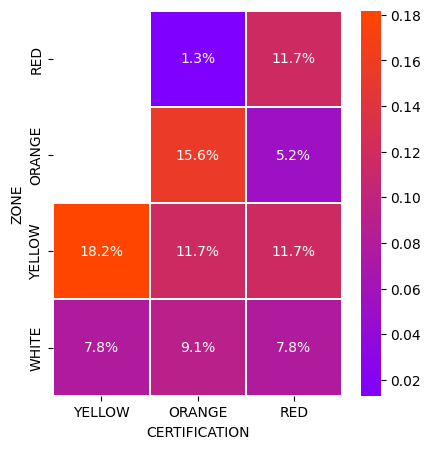

In [44]:
heatmap_data = state_seen_df.pivot(index='ZONE', columns='CERTIFICATION', values='colonna_percentuale')

zones_order = ['RED', 'ORANGE', 'YELLOW', 'WHITE']
certifications_order = ['YELLOW', 'ORANGE', 'RED']

heatmap_data = heatmap_data.loc[zones_order, certifications_order]

fig, ax = plt.subplots(1, 1, figsize = (5, 5))

cmap_custom = LinearSegmentedColormap.from_list('custom', [purple, orange])

sns.heatmap(heatmap_data,
            linewidth = 0.3,
            annot=True,
            cmap=cmap_custom,
            cbar = True,
            fmt='.1%',
            square=True)

plt.show()